In [1]:
import scanpy as sc

In [2]:
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


# Step 1: Filtering

... storing 'feature_types' as categorical
... storing 'genome' as categorical


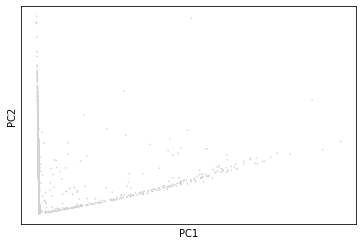

In [3]:
#Before pre-processing
sc.tl.pca(adata, 10)
sc.pl.pca(adata)

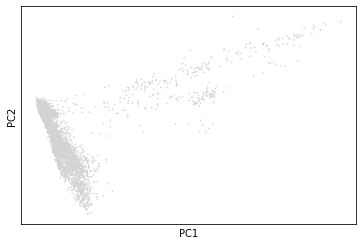

In [4]:
#After processing
sc.pp.recipe_zheng17(adata)
sc.tl.pca(adata, 10)
sc.pl.pca(adata)

# Step 2: Clustering

In [5]:
#Apply leiden clustering
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

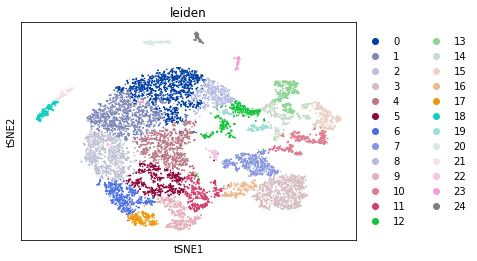

In [6]:
#tsne plot
sc.tl.tsne(adata)
sc.pl.tsne(adata, color = "leiden")

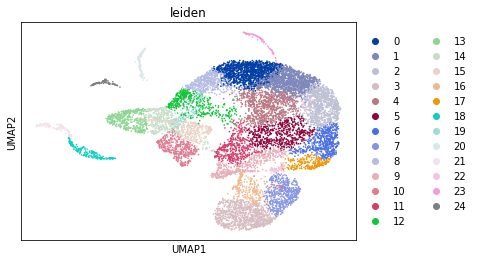

In [7]:
#umap plot
sc.tl.umap(adata)
sc.pl.umap(adata, color = "leiden")

# Step 3: Distinguishing genes

/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


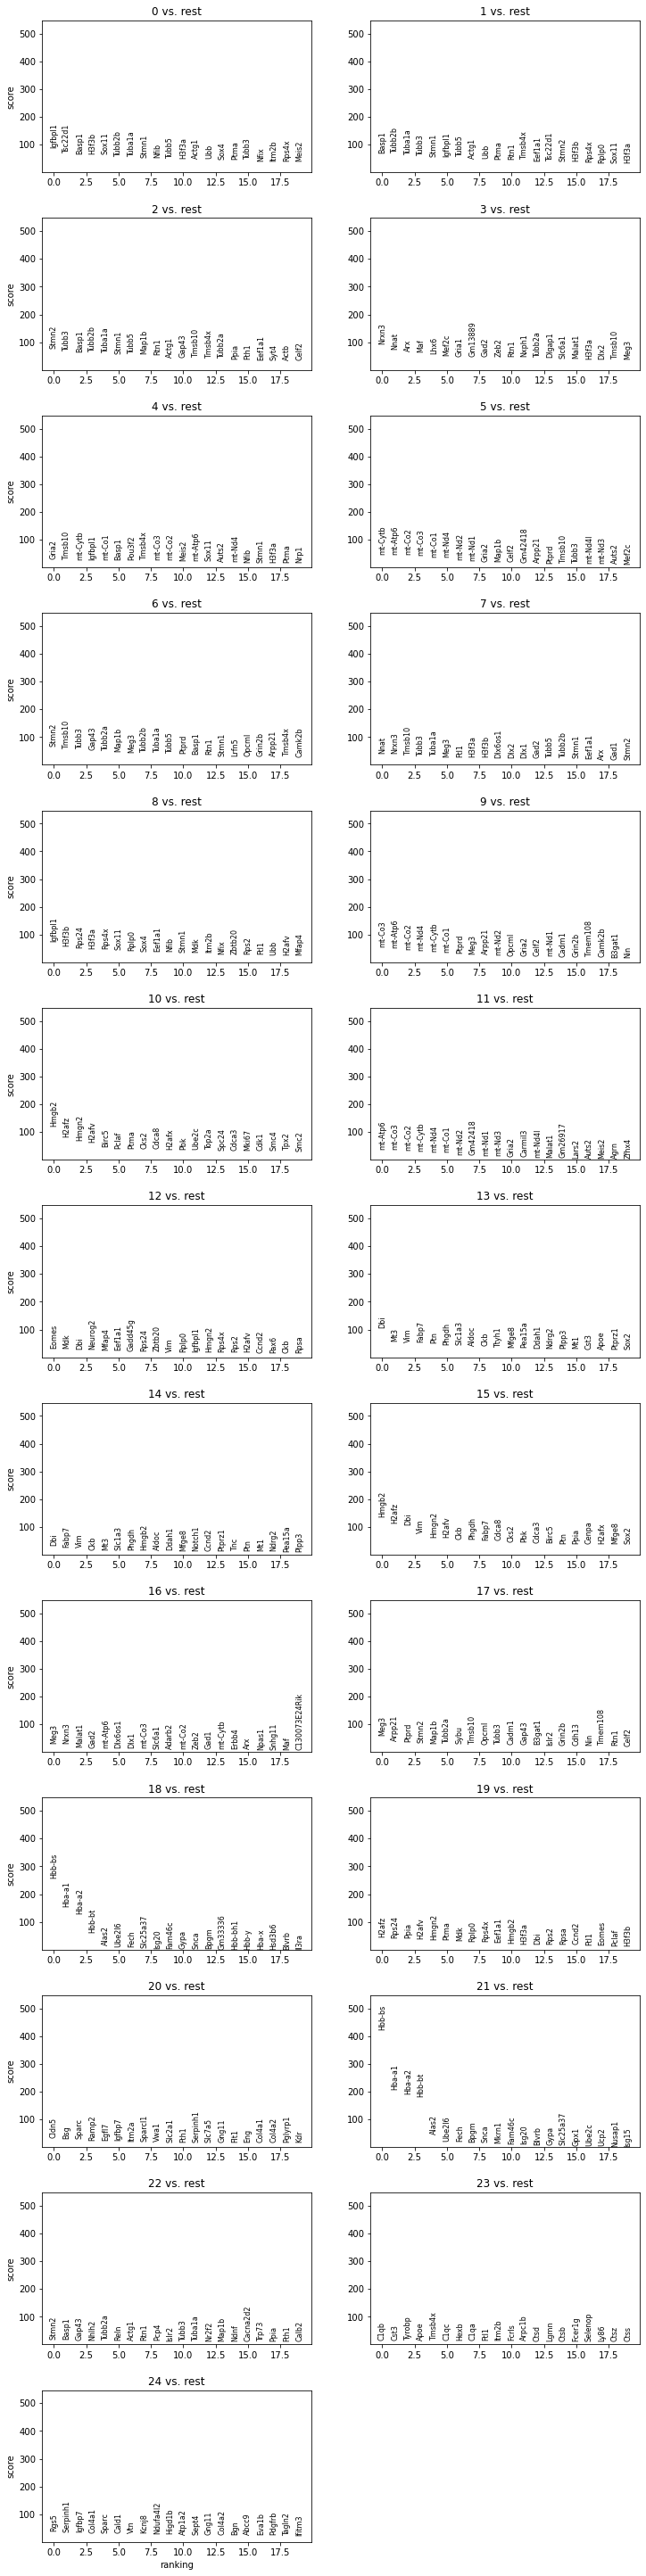

In [8]:
#Rank distinguishing genes by ttest
sc.tl.rank_genes_groups(adata, groupby = "leiden", method = "t-test")
sc.pl.rank_genes_groups(adata, ncols = 2)

/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


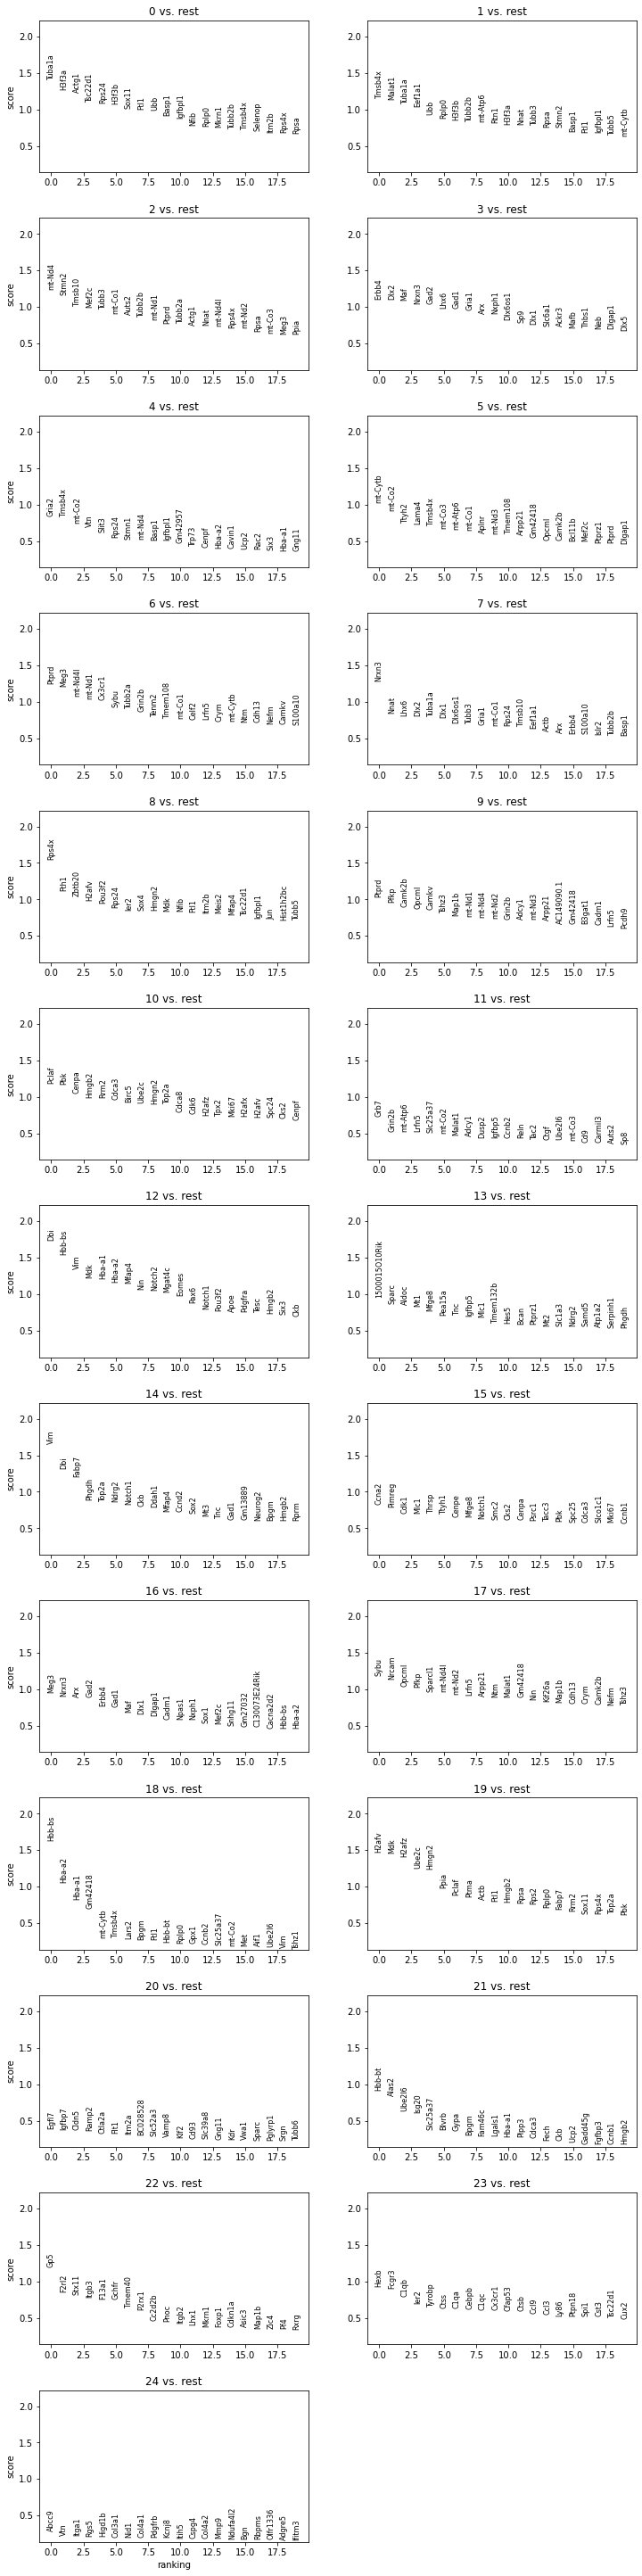

In [9]:
#Rank distinguishing genes by logistic regression
sc.tl.rank_genes_groups(adata, groupby = "leiden", method = "logreg")
sc.pl.rank_genes_groups(adata, ncols = 2)

# Step 4: Cell types

sources: 
https://www.abcam.com/neuroscience/neural-markers-guide
https://www.nature.com/articles/s41598-018-27293-5

(1) Astrocyte: Clu

(2) Microglia: Ccl4

(3) Mature oligodendrocyte: Olig1

(4) Glutamatergic neurons: Grin2b (NMDAR2B)

(5) GABAergic neurons: Gad1

(6) Schwann cell: Gap43

(7) Dopaminergic neurons: Nr4a2

(8) Endothelial cell: Itm2a

(9) Oligodendrocyte precursor cell: Pdgfra

(10) Neuroepithelial cell: Notch1

(11) Radial glia: Hes5

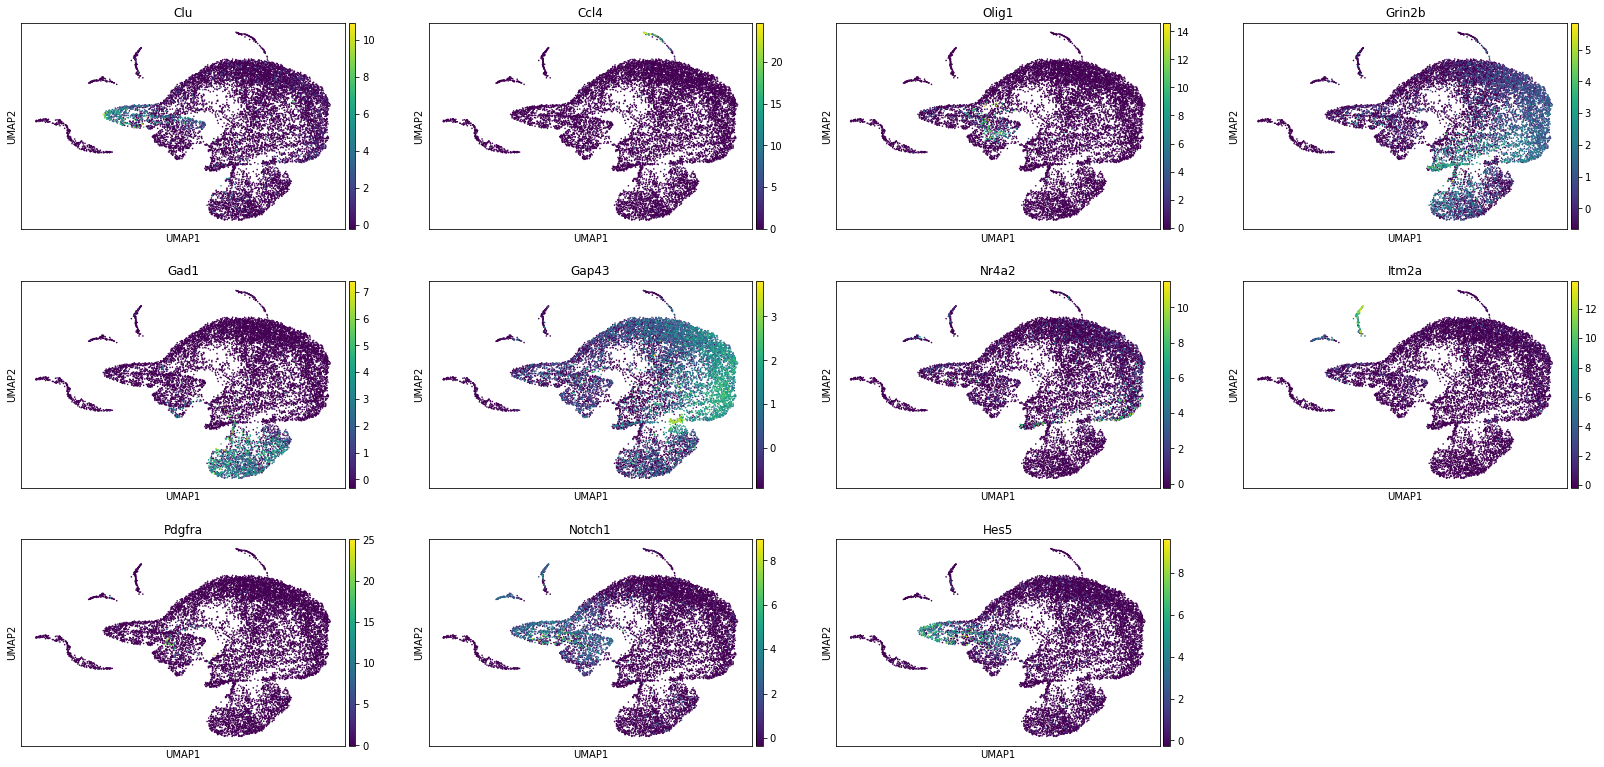

In [75]:
marker_genes = ["Clu", "Ccl4", "Olig1", "Grin2b", "Gad1",
               "Gap43", "Nr4a2", "Itm2a", "Pdgfra", "Notch1",
               "Hes5"]

sc.pl.umap(adata, color = marker_genes)

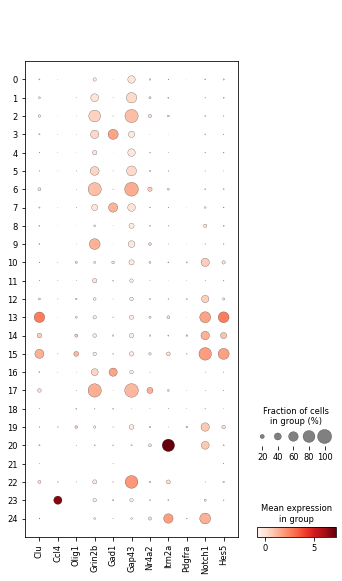

In [76]:
sc.pl.dotplot(adata, marker_genes, groupby="leiden")

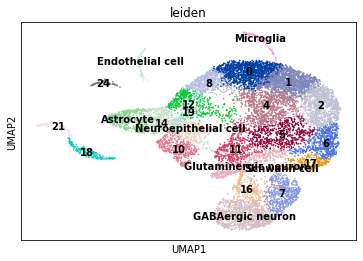

In [77]:
cluster_names = ["0", "1", "2", "GABAergic neuron", "4",
                "5", "6", "7", "8", 
                "Glutaminergic neuron", "10", "11", "12",
                "Astrocyte", "14", "Neuroepithelial cell", "16", 
                "17", "18", "19", "Endothelial cell", 
                "21", "Schwann cell", "Microglia", "24"]
adata.rename_categories("leiden", cluster_names)
sc.pl.umap(adata, color = "leiden", legend_loc = "on data")